In [63]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

sns.set(font_scale=1.5) 
sns.set_style("ticks")


import scipy
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import precision_score, accuracy_score, recall_score, roc_auc_score
from sklearn.utils import resample

pd.set_option('display.max_colwidth', None)
RandomSeed = 42
np.random.seed(RandomSeed)

# Data

In [2]:
data = pd.read_csv('Data/DATA_with_all_FEATURES.csv')
data = data.drop_duplicates(subset = 'Compound ID')
data = data.sort_values(by = 'date')

# First, docked structures fingerprints:

In [3]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, max_features = 'sqrt', random_state = 0)
feature_columns = ['0', '1', '2', '3', '4', '5']
label = ['p_IC50']
ID = ['date']
columns = feature_columns + label + ID 
df_analyse = data[columns]
df_analyse = df_analyse.sort_values(by = 'date')
df_analyse = df_analyse.drop(columns = ['date'])
df_analyse = df_analyse.reset_index(drop = True)

bootstrap_fold = 5
split = [0.1, 0.3, 0.5, 0.7, 0.9]
train_aucs_str = [];
test_aucs_str = []

for k in range(0, len(split)):
    train_size = int(split[k] * df_analyse.shape[0])
    train_data = df_analyse.iloc[0:train_size]
    train_data_diff = pd.DataFrame()
    for i in range(1, train_data.shape[0]):
        train_data_diff_add = train_data.diff(periods = i).dropna()
        train_data_diff = pd.concat([train_data_diff, train_data_diff_add], axis = 0)
    train_data_diff_all = train_data_diff.copy()
    train_data_diff = train_data_diff_all[(train_data_diff_all['p_IC50'] > 0.25)  | (train_data_diff_all['p_IC50'] < -0.25)]
    train_data_diff = train_data_diff.reset_index(drop = True)

    train_labels = train_data_diff['p_IC50']
    train_features = train_data_diff.drop(columns = ['p_IC50'])
    train_labels_comparison = pd.Series(np.where(train_labels > 0, 0, 1))
    model.fit(train_features, train_labels_comparison)
    test_data = df_analyse.iloc[train_size:df_analyse.shape[0]]
    test_data_start = test_data.copy()
    
    for j in range(0, bootstrap_fold):
        test_data = resample(test_data_start, replace=True, n_samples = test_data.shape[0], random_state=j)
        test_data_diff = pd.DataFrame()
        for i in range(1, test_data.shape[0]):
            test_data_diff_add = test_data.diff(periods = i).dropna()
            test_data_diff = pd.concat([test_data_diff, test_data_diff_add], axis = 0)
        test_data_diff_all = test_data_diff.copy()
        test_data_diff = test_data_diff_all[(test_data_diff_all['p_IC50'] > 0.25)  | (test_data_diff_all['p_IC50'] < -0.25)]
        test_data_diff = test_data_diff.reset_index(drop = True)

        test_labels = test_data_diff['p_IC50']
        test_features = test_data_diff.drop(columns = ['p_IC50'])
        test_labels_comparison = pd.Series(np.where(test_labels > 0, 0, 1))

        y_score_train = model.predict_proba(train_features)
        y_score_test = model.predict_proba(test_features)
        test_aucs_str.append(roc_auc_score(test_labels_comparison, y_score_test[:,1]))
    train_aucs_str.append(roc_auc_score(train_labels_comparison, y_score_train[:,1]))
print(train_data.columns)

test_aucs_matrix_str = np.array(test_aucs_str).reshape(len(split), bootstrap_fold)
test_auc_bootstrap_str = np.mean(test_aucs_matrix_str, axis = 1)
test_auc_bootstrap_str_std = np.std(test_aucs_matrix_str, axis = 1)

Index(['0', '1', '2', '3', '4', '5', 'p_IC50'], dtype='object')


# Next, docked structures:

In [4]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, max_features = 'sqrt', random_state = 0)
feature_columns = ['0_d', '1_d', '2_d', '3_d', '4_d', '5_d']
label = ['p_IC50']
ID = ['date']
columns = feature_columns + label + ID 
df_analyse = data[columns]
df_analyse = df_analyse.sort_values(by = 'date')
df_analyse = df_analyse.drop(columns = ['date'])
df_analyse = df_analyse.reset_index(drop = True)

bootstrap_fold = 5
split = [0.1, 0.3, 0.5, 0.7, 0.9]
train_aucs_dock = [];
test_aucs_dock = []

for k in range(0, len(split)):
    train_size = int(split[k] * df_analyse.shape[0])
    train_data = df_analyse.iloc[0:train_size]
    train_data_diff = pd.DataFrame()
    for i in range(1, train_data.shape[0]):
        train_data_diff_add = train_data.diff(periods = i).dropna()
        train_data_diff = pd.concat([train_data_diff, train_data_diff_add], axis = 0)
    train_data_diff_all = train_data_diff.copy()
    train_data_diff = train_data_diff_all[(train_data_diff_all['p_IC50'] > 0.25)  | (train_data_diff_all['p_IC50'] < -0.25)]
    train_data_diff = train_data_diff.reset_index(drop = True)

    train_labels = train_data_diff['p_IC50']
    train_features = train_data_diff.drop(columns = ['p_IC50'])
    train_labels_comparison = pd.Series(np.where(train_labels > 0, 0, 1))
    model.fit(train_features, train_labels_comparison)
    test_data = df_analyse.iloc[train_size:df_analyse.shape[0]]
    test_data_start = test_data.copy()
    
    for j in range(0, bootstrap_fold):
        test_data = resample(test_data_start, replace=True, n_samples = test_data.shape[0], random_state=j)
        test_data_diff = pd.DataFrame()
        for i in range(1, test_data.shape[0]):
            test_data_diff_add = test_data.diff(periods = i).dropna()
            test_data_diff = pd.concat([test_data_diff, test_data_diff_add], axis = 0)
        test_data_diff_all = test_data_diff.copy()
        test_data_diff = test_data_diff_all[(test_data_diff_all['p_IC50'] > 0.25)  | (test_data_diff_all['p_IC50'] < -0.25)]
        test_data_diff = test_data_diff.reset_index(drop = True)

        test_labels = test_data_diff['p_IC50']
        test_features = test_data_diff.drop(columns = ['p_IC50'])
        test_labels_comparison = pd.Series(np.where(test_labels > 0, 0, 1))

        y_score_train = model.predict_proba(train_features)
        y_score_test = model.predict_proba(test_features)
        test_aucs_dock.append(roc_auc_score(test_labels_comparison, y_score_test[:,1]))
    train_aucs_dock.append(roc_auc_score(train_labels_comparison, y_score_train[:,1]))
print(train_data.columns)

test_aucs_matrix_dock = np.array(test_aucs_dock).reshape(len(split), bootstrap_fold)
test_auc_bootstrap_dock = np.mean(test_aucs_matrix_dock, axis = 1)
test_auc_bootstrap_dock_std = np.std(test_aucs_matrix_dock, axis = 1)

Index(['0_d', '1_d', '2_d', '3_d', '4_d', '5_d', 'p_IC50'], dtype='object')


# Now, hybrid

In [5]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, max_features = 'sqrt', random_state = 0)
feature_columns = ['0', '1', '2', '3', '4', '5', '0_d', '1_d', '2_d', '3_d', '4_d', '5_d']
label = ['p_IC50']
ID = ['date']
columns = feature_columns + label + ID 
df_analyse = data[columns]
df_analyse = df_analyse.sort_values(by = 'date')
df_analyse = df_analyse.drop(columns = ['date'])
df_analyse = df_analyse.reset_index(drop = True)

bootstrap_fold = 5
split = [0.1, 0.3, 0.5, 0.7, 0.9]
train_aucs_hybrid = [];
test_aucs_hybrid = []


for k in range(0, len(split)):
    train_size = int(split[k] * df_analyse.shape[0])
    train_data = df_analyse.iloc[0:train_size]
    train_data = train_data.drop(columns = ['0_d', '1_d', '2_d', '3_d', '4_d', '5_d'])

    train_data_diff = pd.DataFrame()
    for i in range(1, train_data.shape[0]):
        train_data_diff_add = train_data.diff(periods = i).dropna()
        train_data_diff = pd.concat([train_data_diff, train_data_diff_add], axis = 0)
    train_data_diff_all = train_data_diff.copy()
    train_data_diff = train_data_diff_all[(train_data_diff_all['p_IC50'] > 0.25)  | (train_data_diff_all['p_IC50'] < -0.25)]
    train_data_diff = train_data_diff.reset_index(drop = True)

    train_labels = train_data_diff['p_IC50']
    train_features = train_data_diff.drop(columns = ['p_IC50'])
    train_labels_comparison = pd.Series(np.where(train_labels > 0, 0, 1))
    model.fit(train_features, train_labels_comparison)
    
    test_data = df_analyse.iloc[train_size:df_analyse.shape[0]]
    test_data = test_data.drop(columns = ['0', '1', '2', '3', '4', '5'])
    test_data_start = test_data.copy()
    
    for j in range(0, bootstrap_fold):
        test_data = resample(test_data_start, replace=True, n_samples = test_data.shape[0], random_state=j)
        test_data_diff = pd.DataFrame()
        for i in range(1, test_data.shape[0]):
            test_data_diff_add = test_data.diff(periods = i).dropna()
            test_data_diff = pd.concat([test_data_diff, test_data_diff_add], axis = 0)
        test_data_diff_all = test_data_diff.copy()
        test_data_diff = test_data_diff_all[(test_data_diff_all['p_IC50'] > 0.25)  | (test_data_diff_all['p_IC50'] < -0.25)]
        test_data_diff = test_data_diff.reset_index(drop = True)

        test_labels = test_data_diff['p_IC50']
        test_features = test_data_diff.drop(columns = ['p_IC50'])
        test_labels_comparison = pd.Series(np.where(test_labels > 0, 0, 1))

        y_score_train = model.predict_proba(train_features)
        y_score_test = model.predict_proba(test_features)
        test_aucs_hybrid.append(roc_auc_score(test_labels_comparison, y_score_test[:,1]))
    train_aucs_hybrid.append(roc_auc_score(train_labels_comparison, y_score_train[:,1]))
print(train_data.columns)
print(test_data.columns)

test_aucs_matrix_hybrid = np.array(test_aucs_hybrid).reshape(len(split), bootstrap_fold)
test_auc_bootstrap_hybrid = np.mean(test_aucs_matrix_hybrid, axis = 1)
test_auc_bootstrap_hybrid_std = np.std(test_aucs_matrix_hybrid, axis = 1)

Index(['0', '1', '2', '3', '4', '5', 'p_IC50'], dtype='object')
Index(['0_d', '1_d', '2_d', '3_d', '4_d', '5_d', 'p_IC50'], dtype='object')


# Finally, Morgan:

In [6]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, max_features = 'sqrt', random_state = 0)
feature_columns = list(data.columns[data.columns.str.contains('Mgn')])
label = ['p_IC50']
ID = ['date']
columns = feature_columns + label + ID 
df_analyse = data[columns]
df_analyse = df_analyse.sort_values(by = 'date')
df_analyse = df_analyse.drop(columns = ['date'])
df_analyse = df_analyse.reset_index(drop = True)

bootstrap_fold = 5
split = [0.1, 0.3, 0.5, 0.7, 0.9]
train_aucs_MFP = [];
test_aucs_MFP = []

for k in range(0, len(split)):
    train_size = int(split[k] * df_analyse.shape[0])
    train_data = df_analyse.iloc[0:train_size]
    train_data_diff = pd.DataFrame()
    for i in range(1, train_data.shape[0]):
        train_data_diff_add = train_data.diff(periods = i).dropna()
        train_data_diff = pd.concat([train_data_diff, train_data_diff_add], axis = 0)
    train_data_diff_all = train_data_diff.copy()
    train_data_diff = train_data_diff_all[(train_data_diff_all['p_IC50'] > 0.25)  | (train_data_diff_all['p_IC50'] < -0.25)]
    train_data_diff = train_data_diff.reset_index(drop = True)

    train_labels = train_data_diff['p_IC50']
    train_features = train_data_diff.drop(columns = ['p_IC50'])
    train_labels_comparison = pd.Series(np.where(train_labels > 0, 0, 1))
    model.fit(train_features, train_labels_comparison)
    test_data = df_analyse.iloc[train_size:df_analyse.shape[0]]
    test_data_start = test_data.copy()
    
    for j in range(0, bootstrap_fold):
        test_data = resample(test_data_start, replace=True, n_samples = test_data.shape[0], random_state=j)
        test_data_diff = pd.DataFrame()
        for i in range(1, test_data.shape[0]):
            test_data_diff_add = test_data.diff(periods = i).dropna()
            test_data_diff = pd.concat([test_data_diff, test_data_diff_add], axis = 0)
        test_data_diff_all = test_data_diff.copy()
        test_data_diff = test_data_diff_all[(test_data_diff_all['p_IC50'] > 0.25)  | (test_data_diff_all['p_IC50'] < -0.25)]
        test_data_diff = test_data_diff.reset_index(drop = True)

        test_labels = test_data_diff['p_IC50']
        test_features = test_data_diff.drop(columns = ['p_IC50'])
        test_labels_comparison = pd.Series(np.where(test_labels > 0, 0, 1))

        y_score_train = model.predict_proba(train_features)
        y_score_test = model.predict_proba(test_features)
        test_aucs_MFP.append(roc_auc_score(test_labels_comparison, y_score_test[:,1]))
    train_aucs_MFP.append(roc_auc_score(train_labels_comparison, y_score_train[:,1]))
print(train_data.columns)

test_aucs_matrix_MFP = np.array(test_aucs_MFP).reshape(len(split), bootstrap_fold)
test_auc_bootstrap_MFP = np.mean(test_aucs_matrix_MFP, axis = 1)
test_auc_bootstrap_MFP_std = np.std(test_aucs_matrix_MFP, axis = 1)



Index(['0_Mgn', '1_Mgn', '2_Mgn', '3_Mgn', '4_Mgn', '5_Mgn', '6_Mgn', '7_Mgn',
       '8_Mgn', '9_Mgn',
       ...
       '503_Mgn', '504_Mgn', '505_Mgn', '506_Mgn', '507_Mgn', '508_Mgn',
       '509_Mgn', '510_Mgn', '511_Mgn', 'p_IC50'],
      dtype='object', length=513)


# Comparison

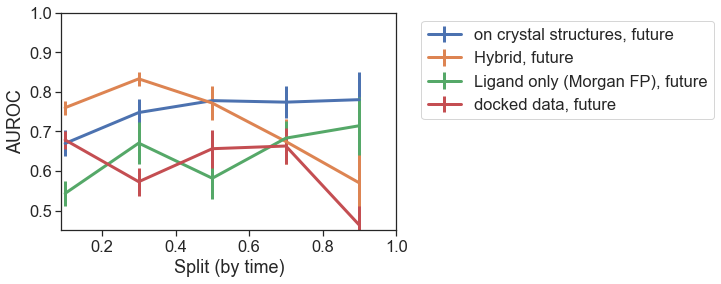

In [7]:
plt.errorbar(split, test_auc_bootstrap_str, yerr = test_auc_bootstrap_str_std, label = 'on crystal structures, future', linewidth = 3)
plt.errorbar(split, test_auc_bootstrap_hybrid, yerr = test_auc_bootstrap_hybrid_std, label = 'Hybrid, future', linewidth = 3)
plt.errorbar(split, test_auc_bootstrap_MFP, yerr = test_auc_bootstrap_MFP_std, label = 'Ligand only (Morgan FP), future', linewidth = 3)
plt.errorbar(split, test_auc_bootstrap_dock, yerr = test_auc_bootstrap_dock_std, label = 'docked data, future', linewidth = 3)
plt.xlim([0.09, 1])
plt.ylim([0.45, 1])
plt.xlabel('Split (by time)')
plt.ylabel('AUROC')
plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left')
plt.savefig('Results/future_comparion_of_approaches_BS' + str(bootstrap_fold) + '.pdf')
plt.show()

# Identical but with scaffold split explicitly introduced:

# First on crystal structures:

In [8]:
bootstrap_fold = 25
time_split = [0.2, 0.4, 0.5, 0.6, 0.7, 0.8]

In [9]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, max_features = 'sqrt', random_state = 0)
feature_columns = ['0', '1', '2', '3', '4', '5']
label = ['p_IC50']
inf_columns = ['scaffold']
columns = feature_columns + label + inf_columns
df_analyse = data[columns]
df_analyse = df_analyse.reset_index(drop = True)
train_aucs_str_sc = []
test_aucs_str_sc = []

for k in range(0, len(time_split)):
    train_size = int(time_split[k] * df_analyse.shape[0])
    train_data = df_analyse.iloc[0:train_size]
    test_data = df_analyse.iloc[train_size:df_analyse.shape[0]]

    train_data = train_data[train_data['scaffold'].isin(['Aminopyridine-like', 'Isoquinoline'])]
    test_data = test_data[test_data['scaffold'].isin(['Benzotriazole', 'Quinolone'])]
    train_data = train_data.drop(columns = ['scaffold'])
    test_data = test_data.drop(columns = ['scaffold'])

    train_data_diff = pd.DataFrame()
    for i in range(1, train_data.shape[0]):
        train_data_diff_add = train_data.diff(periods = i).dropna()
        train_data_diff = pd.concat([train_data_diff, train_data_diff_add], axis = 0)
    train_data_diff_all = train_data_diff.copy()
    train_data_diff = train_data_diff_all[(train_data_diff_all['p_IC50'] > 0.25)  | (train_data_diff_all['p_IC50'] < -0.25)]
    train_data_diff = train_data_diff.reset_index(drop = True)

    train_labels = train_data_diff['p_IC50']
    train_features = train_data_diff.drop(columns = ['p_IC50'])
    train_labels_comparison = pd.Series(np.where(train_labels > 0, 0, 1))
    model.fit(train_features, train_labels_comparison)
    
    test_data_start = test_data.copy()
    
    for j in range(0, bootstrap_fold):
        test_data = resample(test_data_start, replace=True, n_samples = test_data.shape[0], random_state=j)
        test_data_diff = pd.DataFrame()
        for i in range(1, test_data.shape[0]):
            test_data_diff_add = test_data.diff(periods = i).dropna()
            test_data_diff = pd.concat([test_data_diff, test_data_diff_add], axis = 0)
        test_data_diff_all = test_data_diff.copy()
        test_data_diff = test_data_diff_all[(test_data_diff_all['p_IC50'] > 0.25)  | (test_data_diff_all['p_IC50'] < -0.25)]
        test_data_diff = test_data_diff.reset_index(drop = True)

        test_labels = test_data_diff['p_IC50']
        test_features = test_data_diff.drop(columns = ['p_IC50'])
        test_labels_comparison = pd.Series(np.where(test_labels > 0, 0, 1))

        y_score_train = model.predict_proba(train_features)
        y_score_test = model.predict_proba(test_features)
        test_aucs_str_sc.append(roc_auc_score(test_labels_comparison, y_score_test[:,1]))
    train_aucs_str_sc.append(roc_auc_score(train_labels_comparison, y_score_train[:,1]))
print(train_data.columns)

test_aucs_matrix_str_sc = np.array(test_aucs_str_sc).reshape(len(time_split), bootstrap_fold)
test_auc_bootstrap_str_sc = np.mean(test_aucs_matrix_str_sc, axis = 1)
test_auc_bootstrap_str_std_sc = np.std(test_aucs_matrix_str_sc, axis = 1)

Index(['0', '1', '2', '3', '4', '5', 'p_IC50'], dtype='object')


# Next, on docked structures:

In [10]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, max_features = 'sqrt', random_state = 0)
feature_columns = ['0_d', '1_d', '2_d', '3_d', '4_d', '5_d']
label = ['p_IC50']
inf_columns = ['scaffold']
columns = feature_columns + label + inf_columns
df_analyse = data[columns]
df_analyse = df_analyse.reset_index(drop = True)

train_aucs_dock_sc = []
test_aucs_dock_sc = []

for k in range(0, len(time_split)):
    train_size = int(time_split[k] * df_analyse.shape[0])
    train_data = df_analyse.iloc[0:train_size]
    test_data = df_analyse.iloc[train_size:df_analyse.shape[0]]

    train_data = train_data[train_data['scaffold'].isin(['Aminopyridine-like', 'Isoquinoline'])]
    test_data = test_data[test_data['scaffold'].isin(['Benzotriazole', 'Quinolone'])]
    train_data = train_data.drop(columns = ['scaffold'])
    test_data = test_data.drop(columns = ['scaffold'])

    train_data_diff = pd.DataFrame()
    for i in range(1, train_data.shape[0]):
        train_data_diff_add = train_data.diff(periods = i).dropna()
        train_data_diff = pd.concat([train_data_diff, train_data_diff_add], axis = 0)
    train_data_diff_all = train_data_diff.copy()
    train_data_diff = train_data_diff_all[(train_data_diff_all['p_IC50'] > 0.25)  | (train_data_diff_all['p_IC50'] < -0.25)]
    train_data_diff = train_data_diff.reset_index(drop = True)

    train_labels = train_data_diff['p_IC50']
    train_features = train_data_diff.drop(columns = ['p_IC50'])
    train_labels_comparison = pd.Series(np.where(train_labels > 0, 0, 1))
    model.fit(train_features, train_labels_comparison)
    
    test_data_start = test_data.copy()
    
    for j in range(0, bootstrap_fold):
        test_data = resample(test_data_start, replace=True, n_samples = test_data.shape[0], random_state=j)
        test_data_diff = pd.DataFrame()
        for i in range(1, test_data.shape[0]):
            test_data_diff_add = test_data.diff(periods = i).dropna()
            test_data_diff = pd.concat([test_data_diff, test_data_diff_add], axis = 0)
        test_data_diff_all = test_data_diff.copy()
        test_data_diff = test_data_diff_all[(test_data_diff_all['p_IC50'] > 0.25)  | (test_data_diff_all['p_IC50'] < -0.25)]
        test_data_diff = test_data_diff.reset_index(drop = True)

        test_labels = test_data_diff['p_IC50']
        test_features = test_data_diff.drop(columns = ['p_IC50'])
        test_labels_comparison = pd.Series(np.where(test_labels > 0, 0, 1))

        y_score_train = model.predict_proba(train_features)
        y_score_test = model.predict_proba(test_features)
        test_aucs_dock_sc.append(roc_auc_score(test_labels_comparison, y_score_test[:,1]))
    train_aucs_dock_sc.append(roc_auc_score(train_labels_comparison, y_score_train[:,1]))
print(train_data.columns)

test_aucs_matrix_dock_sc = np.array(test_aucs_dock_sc).reshape(len(time_split), bootstrap_fold)
test_auc_bootstrap_dock_sc = np.mean(test_aucs_matrix_dock_sc, axis = 1)
test_auc_bootstrap_dock_std_sc = np.std(test_aucs_matrix_dock_sc, axis = 1)

Index(['0_d', '1_d', '2_d', '3_d', '4_d', '5_d', 'p_IC50'], dtype='object')


# Now, on hybrid:

In [11]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, max_features = 'sqrt', random_state = 0)
feature_columns = ['0', '1', '2', '3', '4', '5', '0_d', '1_d', '2_d', '3_d', '4_d', '5_d']
label = ['p_IC50']
inf_columns = ['scaffold']
columns = feature_columns + label + inf_columns
df_analyse = data[columns]
df_analyse = df_analyse.reset_index(drop = True)

train_aucs_hybrid_sc = []
test_aucs_hybrid_sc = []

for k in range(0, len(time_split)):
    train_size = int(time_split[k] * df_analyse.shape[0])
    train_data = df_analyse.iloc[0:train_size]
    test_data = df_analyse.iloc[train_size:df_analyse.shape[0]]
    train_data = train_data.drop(columns = ['0_d', '1_d', '2_d', '3_d', '4_d', '5_d'])
    test_data = test_data.drop(columns = ['0', '1', '2', '3', '4', '5'])

    train_data = train_data[train_data['scaffold'].isin(['Aminopyridine-like', 'Isoquinoline'])]
    test_data = test_data[test_data['scaffold'].isin(['Benzotriazole', 'Quinolone'])]
    train_data = train_data.drop(columns = ['scaffold'])
    test_data = test_data.drop(columns = ['scaffold'])

    train_data_diff = pd.DataFrame()
    for i in range(1, train_data.shape[0]):
        train_data_diff_add = train_data.diff(periods = i).dropna()
        train_data_diff = pd.concat([train_data_diff, train_data_diff_add], axis = 0)
    train_data_diff_all = train_data_diff.copy()
    train_data_diff = train_data_diff_all[(train_data_diff_all['p_IC50'] > 0.25)  | (train_data_diff_all['p_IC50'] < -0.25)]
    train_data_diff = train_data_diff.reset_index(drop = True)

    train_labels = train_data_diff['p_IC50']
    train_features = train_data_diff.drop(columns = ['p_IC50'])
    train_labels_comparison = pd.Series(np.where(train_labels > 0, 0, 1))
    model.fit(train_features, train_labels_comparison)
    
    test_data_start = test_data.copy()
    
    for j in range(0, bootstrap_fold):
        test_data = resample(test_data_start, replace=True, n_samples = test_data.shape[0], random_state=j)
        test_data_diff = pd.DataFrame()
        for i in range(1, test_data.shape[0]):
            test_data_diff_add = test_data.diff(periods = i).dropna()
            test_data_diff = pd.concat([test_data_diff, test_data_diff_add], axis = 0)
        test_data_diff_all = test_data_diff.copy()
        test_data_diff = test_data_diff_all[(test_data_diff_all['p_IC50'] > 0.25)  | (test_data_diff_all['p_IC50'] < -0.25)]
        test_data_diff = test_data_diff.reset_index(drop = True)

        test_labels = test_data_diff['p_IC50']
        test_features = test_data_diff.drop(columns = ['p_IC50'])
        test_labels_comparison = pd.Series(np.where(test_labels > 0, 0, 1))

        y_score_train = model.predict_proba(train_features)
        y_score_test = model.predict_proba(test_features)
        test_aucs_hybrid_sc.append(roc_auc_score(test_labels_comparison, y_score_test[:,1]))
    train_aucs_hybrid_sc.append(roc_auc_score(train_labels_comparison, y_score_train[:,1]))
print(train_data.columns)
print(test_data.columns)


test_aucs_matrix_hybrid_sc = np.array(test_aucs_hybrid_sc).reshape(len(time_split), bootstrap_fold)
test_auc_bootstrap_hybrid_sc = np.mean(test_aucs_matrix_hybrid_sc, axis = 1)
test_auc_bootstrap_hybrid_std_sc = np.std(test_aucs_matrix_hybrid_sc, axis = 1)

Index(['0', '1', '2', '3', '4', '5', 'p_IC50'], dtype='object')
Index(['0_d', '1_d', '2_d', '3_d', '4_d', '5_d', 'p_IC50'], dtype='object')


# Finally, Morgan:

In [12]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, max_features = 'sqrt', random_state = 0)
feature_columns = list(data.columns[data.columns.str.contains('Mgn')])
label = ['p_IC50']
inf_columns = ['scaffold']
columns = feature_columns + label + inf_columns
df_analyse = data[columns]
df_analyse = df_analyse.reset_index(drop = True)

train_aucs_MFP_sc = []
test_aucs_MFP_sc = []

for k in range(0, len(time_split)):
    train_size = int(time_split[k] * df_analyse.shape[0])
    train_data = df_analyse.iloc[0:train_size]
    test_data = df_analyse.iloc[train_size:df_analyse.shape[0]]

    train_data = train_data[train_data['scaffold'].isin(['Aminopyridine-like', 'Isoquinoline'])]
    test_data = test_data[test_data['scaffold'].isin(['Benzotriazole', 'Quinolone'])]
    train_data = train_data.drop(columns = ['scaffold'])
    test_data = test_data.drop(columns = ['scaffold'])

    train_data_diff = pd.DataFrame()
    for i in range(1, train_data.shape[0]):
        train_data_diff_add = train_data.diff(periods = i).dropna()
        train_data_diff = pd.concat([train_data_diff, train_data_diff_add], axis = 0)
    train_data_diff_all = train_data_diff.copy()
    train_data_diff = train_data_diff_all[(train_data_diff_all['p_IC50'] > 0.25)  | (train_data_diff_all['p_IC50'] < -0.25)]
    train_data_diff = train_data_diff.reset_index(drop = True)

    train_labels = train_data_diff['p_IC50']
    train_features = train_data_diff.drop(columns = ['p_IC50'])
    train_labels_comparison = pd.Series(np.where(train_labels > 0, 0, 1))
    model.fit(train_features, train_labels_comparison)
    
    test_data_start = test_data.copy()
    
    for j in range(0, bootstrap_fold):
        test_data = resample(test_data_start, replace=True, n_samples = test_data.shape[0], random_state=j)
        test_data_diff = pd.DataFrame()
        for i in range(1, test_data.shape[0]):
            test_data_diff_add = test_data.diff(periods = i).dropna()
            test_data_diff = pd.concat([test_data_diff, test_data_diff_add], axis = 0)
        test_data_diff_all = test_data_diff.copy()
        test_data_diff = test_data_diff_all[(test_data_diff_all['p_IC50'] > 0.25)  | (test_data_diff_all['p_IC50'] < -0.25)]
        test_data_diff = test_data_diff.reset_index(drop = True)

        test_labels = test_data_diff['p_IC50']
        test_features = test_data_diff.drop(columns = ['p_IC50'])
        test_labels_comparison = pd.Series(np.where(test_labels > 0, 0, 1))

        y_score_train = model.predict_proba(train_features)
        y_score_test = model.predict_proba(test_features)
        test_aucs_MFP_sc.append(roc_auc_score(test_labels_comparison, y_score_test[:,1]))
    train_aucs_MFP_sc.append(roc_auc_score(train_labels_comparison, y_score_train[:,1]))
print(train_data.columns)

test_aucs_matrix_MFP_sc = np.array(test_aucs_MFP_sc).reshape(len(time_split), bootstrap_fold)
test_auc_bootstrap_MFP_sc = np.mean(test_aucs_matrix_MFP_sc, axis = 1)
test_auc_bootstrap_MFP_std_sc = np.std(test_aucs_matrix_MFP_sc, axis = 1)

Index(['0_Mgn', '1_Mgn', '2_Mgn', '3_Mgn', '4_Mgn', '5_Mgn', '6_Mgn', '7_Mgn',
       '8_Mgn', '9_Mgn',
       ...
       '503_Mgn', '504_Mgn', '505_Mgn', '506_Mgn', '507_Mgn', '508_Mgn',
       '509_Mgn', '510_Mgn', '511_Mgn', 'p_IC50'],
      dtype='object', length=513)


# Comparison

In [86]:
indeces = [int(x* df_analyse.shape[0]) for x in time_split]
print(data['date'].loc[indeces])
print(data['date'].loc[0])
months = [1.7, 2, 3, 4.3, 5.4]

39     20200510
79     20200515
99     20200516
118    20200617
138    20200728
158    20200826
Name: date, dtype: int64
20200316


In [14]:
data = data.reset_index(drop = True)
maximums = []
for i in range(0, len(data['p_IC50'])):
    maximums.append(np.max(data['p_IC50'].iloc[0:i]))
data['p_IC50_max'] = maximums

In [91]:
[data.shape[0]*x for x in time_split]

[39.6, 79.2, 99.0, 118.8, 138.6, 158.4]

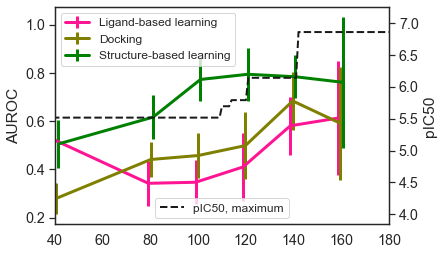

In [92]:
sns.set(font_scale=1.3) 
sns.set_style("ticks")
sns.set_style("white")

fig, ax = plt.subplots()

#plt.errorbar(time_split, test_auc_bootstrap_str_sc,   yerr = test_auc_bootstrap_str_std_sc, label = 'on crystal structures, future', linewidth = 3)
ax.errorbar([data.shape[0]*x for x in time_split], test_auc_bootstrap_MFP_sc,   yerr = test_auc_bootstrap_MFP_std_sc , color = 'deeppink', label = 'Ligand-based learning', linewidth = 3)
ax.errorbar([data.shape[0]*x + 1 for x in time_split], test_auc_bootstrap_dock_sc,  yerr = test_auc_bootstrap_dock_std_sc, color = 'olive', label = 'Docking', linewidth = 3)
ax.errorbar([data.shape[0]*x + 2 for x in time_split], test_auc_bootstrap_hybrid_sc,yerr = test_auc_bootstrap_hybrid_std_sc, color = 'green', label = 'Structure-based learning', linewidth = 3)
#ax.errorbar(months, test_auc_bootstrap_MFP_sc,   yerr = test_auc_bootstrap_MFP_std_sc , color = 'deeppink', label = 'Ligand-based learning', linewidth = 3)
#ax.errorbar(months, test_auc_bootstrap_dock_sc,  yerr = test_auc_bootstrap_dock_std_sc, color = 'olive', label = 'Docking', linewidth = 3)
#ax.errorbar(months, test_auc_bootstrap_hybrid_sc,yerr = test_auc_bootstrap_hybrid_std_sc, color = 'green', label = 'Structure-based learning', linewidth = 3)

ax.set_ylabel('AUROC')

data = data.reset_index(drop = True)
ax2=ax.twinx()
ax2.plot(data['p_IC50_max'], color = 'k', linestyle = '--', linewidth = 2, label = 'pIC50, maximum')
ax2.set_xlim([40, 180])
ax2.set_xlabel('# structures (chronological)')
ax2.set_ylabel('pIC50')
#ax.legend(bbox_to_anchor = (1.05, 1), loc='upper left')
#ax2.legend(bbox_to_anchor = (1.05, 1), loc='upper left')
ax.legend(loc = 2, fontsize = 12)
ax2.legend(loc = 8, fontsize = 12)
plt.savefig('Results/future_comparion_of_approaches_BS' + str(bootstrap_fold) + '_scaffold_split.pdf')
plt.show()



39     20200510
79     20200515
99     20200516
118    20200617
138    20200728
158    20200826
Name: date, dtype: int64
20200316


# Earlier result:


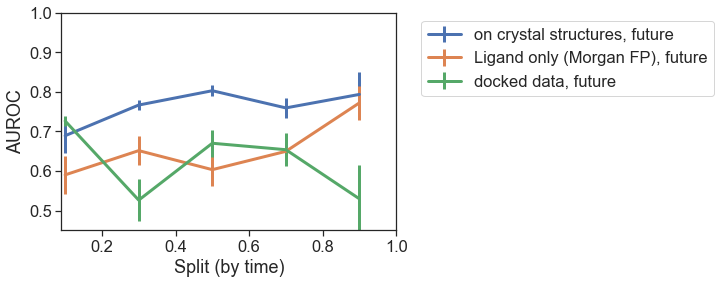

In [64]:
#plt.plot(split, train_aucs, label = 'on crystal structures, existing', linewidth = 2)
#plt.plot(split, train_aucs_dock, label = 'docked data, existing', linewidth = 2)
#plt.plot(split, train_aucs_MFP, label = 'MFP, existing', linewidth = 2)
plt.errorbar(split, test_auc_bootstrap, yerr = test_auc_bootstrap_std, label = 'on crystal structures, future', linewidth = 3)
plt.errorbar(split, test_auc_bootstrap_MFP, yerr = test_auc_bootstrap_MFP_std, label = 'Ligand only (Morgan FP), future', linewidth = 3)
plt.errorbar(split, test_auc_bootstrap_dock, yerr = test_auc_bootstrap_dock_std, label = 'docked data, future', linewidth = 3)
plt.xlim([0.09, 1])
plt.ylim([0.45, 1])
plt.xlabel('Split (by time)')
plt.ylabel('AUROC')
plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left')
plt.savefig('predict_future_5fold-btsp_RS42.pdf')
plt.show()